In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

In [2]:
func1 = ss.norm(loc=3.0,scale=0.5)
x = np.arange(0.5,10.0,0.02)
y1 = func1.pdf(x)*20000./0.25*0.025
func2= ss.norm(loc=5.0,scale=0.35)
y2 = func2.pdf(x)*40000./0.35*0.035
ytot = y1+y2

60000


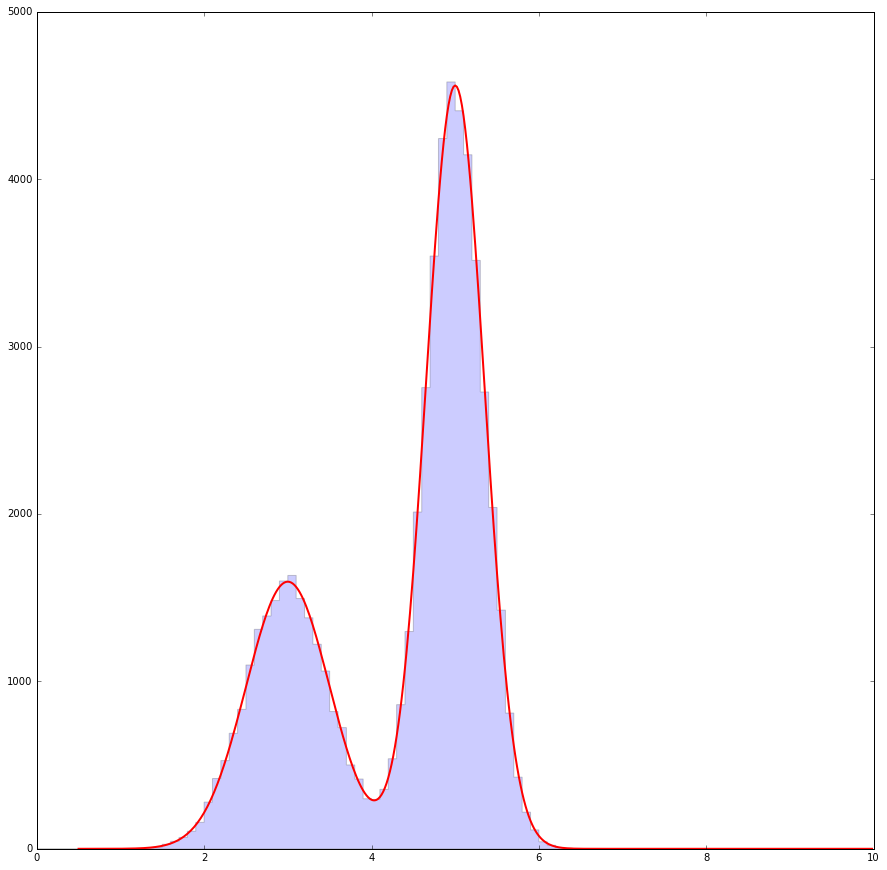

In [3]:
samples1 = np.array(func1.rvs(size=20000))
samples2 = np.array(func2.rvs(size=40000))
bigsample = np.append(samples1,samples2)
print len(bigsample)
fig = plt.figure(figsize=(15,15))
plt.hist(bigsample, bins = np.arange(0.0,8.0,0.1),normed=False, histtype='stepfilled', alpha=0.2)
plt.plot(x,ytot,lw=2,c='r')

In [4]:
smallgrid=np.zeros([60000,len(y1)])
for i in range(20000):
    smallgrid[i,:] = y1
for i in range(20000,60000):
    smallgrid[i,:] = y2
approx_pdf = qp.Ensemble(smallgrid.shape[0],gridded=(x,smallgrid))

made the pool of 4 in 0.0462019443512
made the catalog in 143.139957905


In [5]:
testme = inmet.EvaluateMetric(approx_pdf,bigsample)

In [6]:
testPIT = testme.PIT()

# Test KL Divergence

we'll need to create a qp.PDF object for a uniform distribution on the same range as the 

In [48]:
tmparray = np.arange(0.0,1.0,0.0005)
tmpuni = np.ones(len(tmparray))

Plotted gridded.


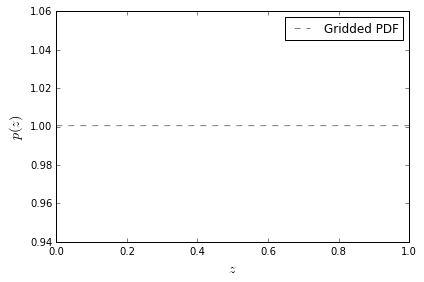

In [49]:
unipdf = qp.PDF(gridded=(tmparray,tmpuni))
unipdf.plot()

create samples object of PIT values, compare those to uniform

Created a KDE interpolator for the samples parametrization.
interpolating between 4.34359301712e-06 and 0.999976795684 using samples
Plotted samples


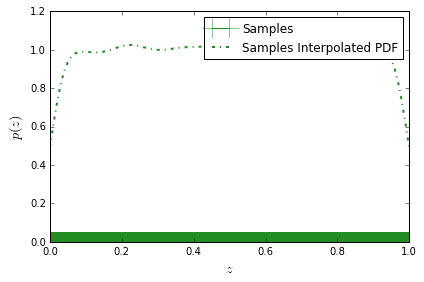

In [50]:
pitpdf = qp.PDF(samples=testPIT)
pitpdf.plot()

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 0.9995 using samples


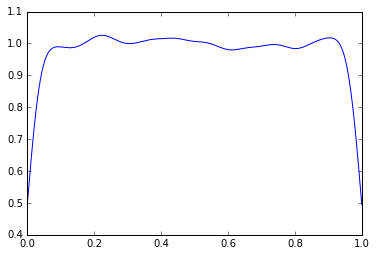

In [51]:
pitshape = pitpdf.evaluate(tmparray)
plt.plot(pitshape[0],pitshape[1])

In [52]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.0,1.05),dx=0.025,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 1.025 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 1.025 using gridded
almost normalized integrals
0.605329782747


In [53]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.0,1.0001),dx=0.025,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 1.0 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 1.0 using gridded
almost normalized integrals
0.434910831863


In [54]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(-1.0,2.0),dx=0.025,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -1.0 and 1.975 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -1.0 and 1.975 using gridded
almost normalized integrals
0.881437033444


In [55]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.0,1.05),dx=0.005,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 1.045 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 1.045 using gridded
almost normalized integrals
0.436661200458


In [56]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.0,1.01),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 1.009 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 1.009 using gridded
almost normalized integrals
0.155327633643


In [57]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.0,1.01),dx=0.0001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 1.0099 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 1.0099 using gridded
almost normalized integrals
0.160171252115


In [58]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.05,.95),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.05 and 0.949 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.05 and 0.949 using gridded
almost normalized integrals
3.9467666585e-05


In [59]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.05,.95),dx=0.0005,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.05 and 0.9495 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.05 and 0.9495 using gridded
almost normalized integrals
6.87257743708e-05


In [60]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.1,.9),dx=0.0005,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.1 and 0.8995 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.1 and 0.8995 using gridded
almost normalized integrals
7.94001086815e-05


In [64]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.1,.9),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.1 and 0.899 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.1 and 0.899 using gridded
almost normalized integrals
8.1005154527e-05


In [65]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.1,.9),dx=0.005,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.1 and 0.895 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.1 and 0.895 using gridded
almost normalized integrals
9.28900273916e-05


In [61]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.3,.7),dx=0.0005,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.3 and 0.6995 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.3 and 0.6995 using gridded
almost normalized integrals
6.91064969553e-05


In [62]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.3,.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.3 and 0.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.3 and 0.699 using gridded
almost normalized integrals
6.30679086845e-05


In [63]:
kldtest = qp.utils.calculate_kl_divergence(pitpdf,unipdf,limits=(0.3,.7),dx=0.005,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.3 and 0.695 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.3 and 0.695 using gridded
almost normalized integrals
9.44928127673e-06
